**A1**

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

train_data = pd.read_csv('train (2).csv')
test_data = pd.read_csv('test (2).csv')

merged_data = pd.concat([train_data, test_data], ignore_index=True)

merged_data = merged_data.drop('Class', axis=1)

numerical_features = merged_data.select_dtypes(include=['int64', 'float64'])

imputer = SimpleImputer(strategy='mean')
numerical_features_imputed = pd.DataFrame(imputer.fit_transform(numerical_features), columns=numerical_features.columns)

scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features_imputed)

k = 3

kmeans = KMeans(n_clusters=k, random_state=42)
merged_data['Cluster'] = kmeans.fit_predict(numerical_features_scaled)

print(merged_data['Cluster'].value_counts())

merged_data.to_csv('merged_data_with_clusters.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    26402
2    22874
1    21465
Name: Cluster, dtype: int64


**A2**

NaN Values:
 Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction               

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

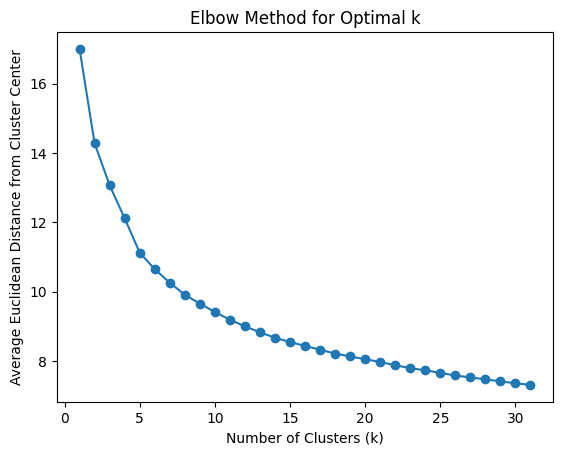

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('test (2).csv')

print("NaN Values:\n", df.isnull().sum())
print("\nData Description:\n", df.describe())

df = df.dropna()
df.replace([np.inf, -np.inf], np.finfo(np.float32).max, inplace=True)

features = df.iloc[:, 7:24]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

avg_distances = []

k_values = range(1, 32)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    avg_distances.append(kmeans.inertia_ / features_scaled.shape[0])

plt.plot(k_values, avg_distances, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Euclidean Distance from Cluster Center')
plt.show()


**A3**

NaN Values:
 Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction               

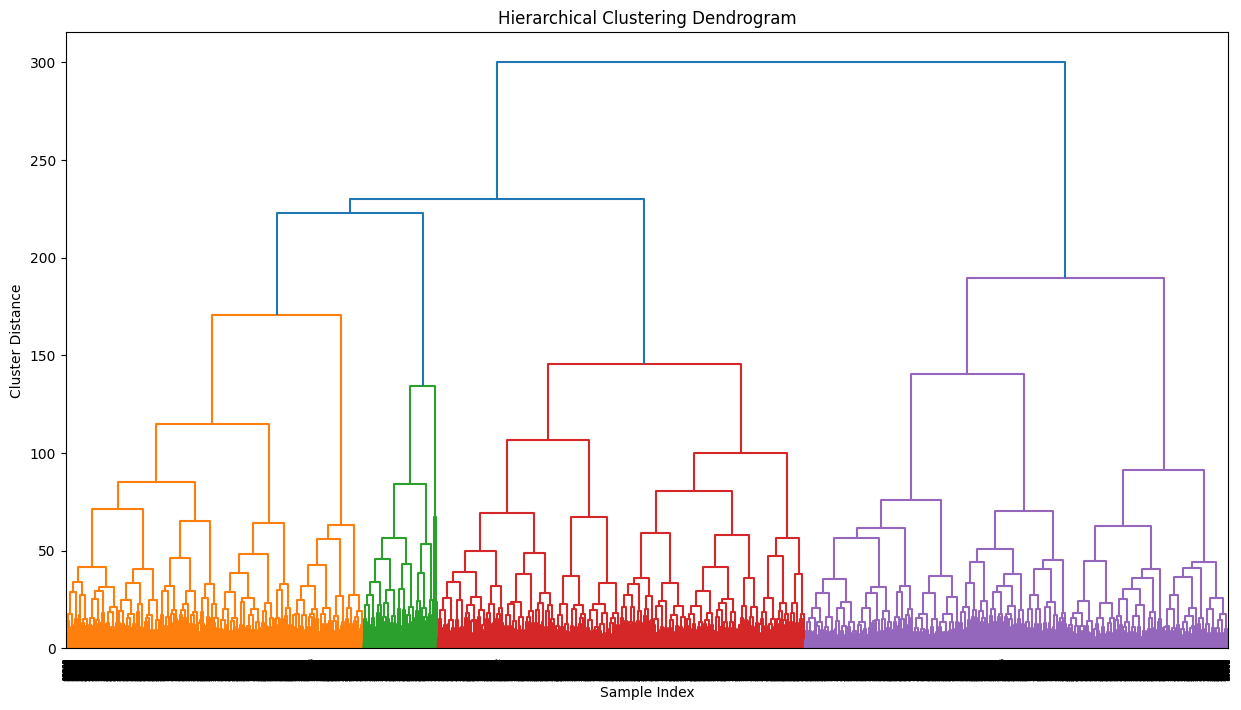

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

df = pd.read_csv('test (2).csv')

print("NaN Values:\n", df.isnull().sum())
print("\nData Description:\n", df.describe())

df = df.dropna()
df.replace([np.inf, -np.inf], np.finfo(np.float32).max, inplace=True)

features = df.iloc[:, 7:24]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

agglomerative = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='ward')
agglomerative.fit(features_scaled)

linked = linkage(features_scaled, 'ward')
plt.figure(figsize=(15, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Cluster Distance')
plt.show()


**A4**

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector

df = pd.read_csv('test (2).csv')

print("NaN Values:\n", df.isnull().sum())
print("\nData Description:\n", df.describe())

df = df.dropna()
df.replace([np.inf, -np.inf], np.finfo(np.float32).max, inplace=True)

X = df.iloc[:, 7:24]
y = df['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)

sfs = SequentialFeatureSelector(clf, n_features_to_select=5, direction='forward', cv=5)
sfs.fit(X_train, y_train)

selected_features = X.columns[sfs.get_support()]
selected_indices = sfs.get_support(indices=True)

print("Selected Features:")
print(selected_features)
print("Indices of Selected Features:")
print(selected_indices)


NaN Values:
 Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction               

**A5**

NaN Values:
 Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction               

<ipython-input-8-b20f030d2e56>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace([np.inf, -np.inf], np.finfo(np.float32).max, inplace=True)  # Replace infinite values


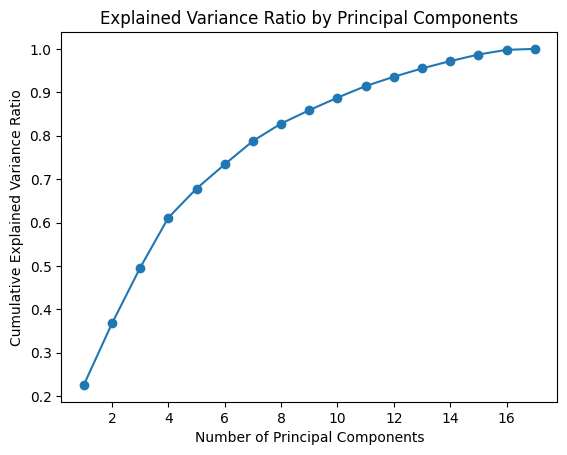


Number of features needed to capture 95% of data variance: 13


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('test (2).csv')

print("NaN Values:\n", df.isnull().sum())
print("\nData Description:\n", df.describe())

df = df.dropna()
df.replace([np.inf, -np.inf], np.finfo(np.float32).max, inplace=True)
X = df.iloc[:, 7:24]
y = df['satisfaction']

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_standardized)

plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
num_features_for_95_percent_variance = np.argmax(cumulative_variance_ratio >= 0.95) + 1

print(f"\nNumber of features needed to capture 95% of data variance: {num_features_for_95_percent_variance}")


**A6**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

df = pd.read_csv('test (2).csv')

print("NaN Values:\n", df.isnull().sum())
print("\nData Description:\n", df.describe())

df = df.dropna()
df.replace([np.inf, -np.inf], np.finfo(np.float32).max, inplace=True)

X = df.iloc[:, 7:24]
y = df['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

K = 10

pca = PCA(n_components=K)
X_train_pca = pca.fit_transform(X_train_standardized)
X_test_pca = pca.transform(X_test_standardized)

clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on the transformed dataset: {accuracy:.2f}")


NaN Values:
 Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction               